# Using the Uplift Package
This package contains a quadratic program implementation of the `USVM` model proposed by [Zaniewicz and Jaroszewicz (2013)](http://ieeexplore.ieee.org/abstract/document/6753912/), along with auxiliary methods for producing graphics. The internal numerical optimization is handled by [`cvxopt`](http://cvxopt.org). This readme walks through the usage of the `USVM` class, demonstrating how to fit an Uplift SVM model to data and reproduce the graphics presented in the paper.

### Model Fitting and Optimization
First, we'll simulate data for modeling.

In [1]:
import numpy as np

m = 100; nt = 200; nc = 300; n = nt + nc;

Xt = np.random.normal(size=[nt, m])
yt = (2*np.round(np.random.uniform(0, 1.45, size=nt)) -1).reshape((nt,1))
treatment = np.hstack((yt, Xt))

Xc = np.random.normal(size=[nc, m]) + 2
yc = (2*np.random.randint(2, size=nc) -1).reshape((nc,1))
control = np.hstack((yc, Xc))

Next we'll import from the `USVM` class.

In [2]:
from uplift import USVM

and initialize `USVM` by passing in our simulated data.

In [3]:
model = USVM(treatment=treatment, control=control)

Successfully initialized.


The `USVM` class has two modeling methods:
1. `USVM.optimize(C1, C2divC1)` where $C_1$ is the penalty for misclassified points on the first hyperplane, and $C_2/C_1$ controls how harshly neutral points are penalized.
2. `USVM.predict(X)` where $X$ is a numpy array from the same feature space as `treatment` and `control`, for which the model was built. This will output a vector of predicted labels.

In [4]:
model.optimize(C1=.5, C2divC1=1.7) # this performs the optimization routine using CVX

Optimal parameters stored.


Once this routine is performed, the user can observe the hyperplane slope parameter $\mathbf{w}$ and intercept terms $(b_1, b_2)$ via the `.w`, `.b1`, or `.b2` attributes, respectively.

In [5]:
# For example...
print(model.b1)
print(model.b2)

-0.318215615721
-1.21667616163


To observe how the model fit to the data, we may call `.predict` on our treatment feature-vector matrix `Xt` generated in the first cell above.

In [6]:
model.predict(X=Xt) # outputs class labels

array([[ 0],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [-1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 1],
       [-1],
       [ 1],

### Graphics

In [7]:
%matplotlib inline

**CUMULATIVE ACCURACY PROFILES.** We can produce a cumulative accuracy profile for the UVSM classifier using `.upliftCurve`, which takes a `treatment` array, `control` array, and a `gridSize` controling the granularity of the plot. We'll proceed with the same dataframes we simulated in the beginning of this problem.

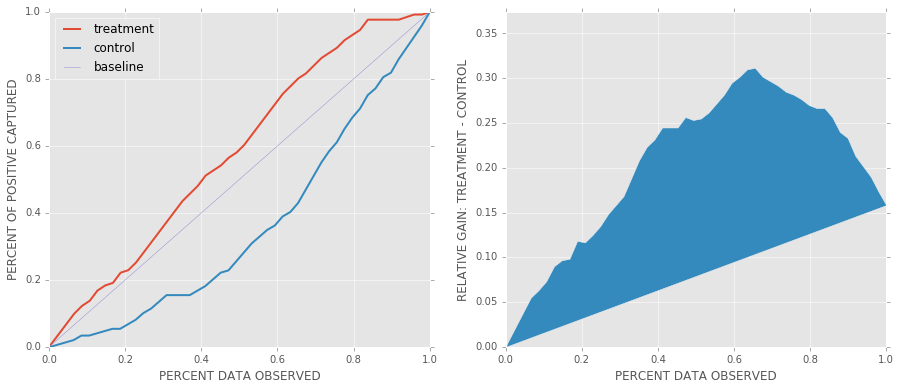

In [8]:
model.upliftCurve(treatment=treatment, control=control, gridSize=50)

The leftmost figure displays the recall of positive cases that the classifier exhibits when passing through each group seperately. For example, observing the top 40% of the treatment group results in capturing about 50% of the positive cases *in the treatment group*. The same applies to the control group.

The rightmost plot—known as the uplift curve—subtracts the control recall curve from that of the treatment, weighting each by the proportion of positive cases in each group. This graphic demonstates where the gains of the treatment are most notable. More on this is discussed in figure 4 of the paper, with citations to other work available in the references therein. **Note that these graphics will be misleading if the proportion of positive cases in the treatment group is less than or equal to the proportion in the control group.**

**CLASSIFICATION RATES.** The `.rates` method allows for visualization of how the positive, neutral, and negative proportions vary with the penalty ratio $C_2/C_1$ for a fixed $C_1$. The default ratio range over which to plot the rates is a 10-length grid on the interval `[1,1.5]`, for which $C_1$ is fixed at `.5`. The user may supply a different list if so desired.

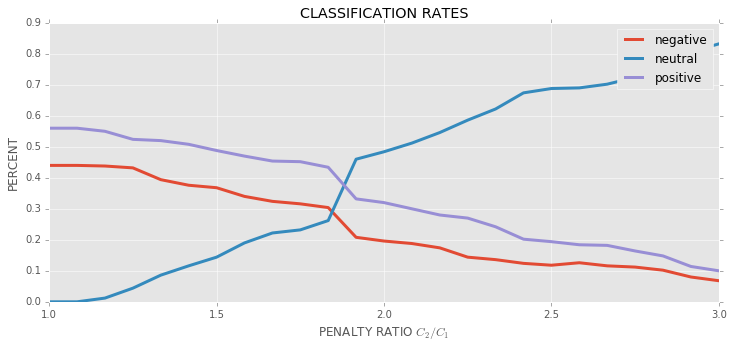

In [9]:
model.rates(rangeC2divC1 = np.linspace(1, 3, 25)) # 25-length grid on [1, 3]

**2D HYPERPLANES.** To plot the hyperplanes for a two dimensional example, we'll take the first two columns of the feature matrices of the previous example. Then, we'll pass these as a four-tuple (positives in treatement, negatives in control, negatives in treatment, positives in control) to the parameter `data` (note that these are arrays).

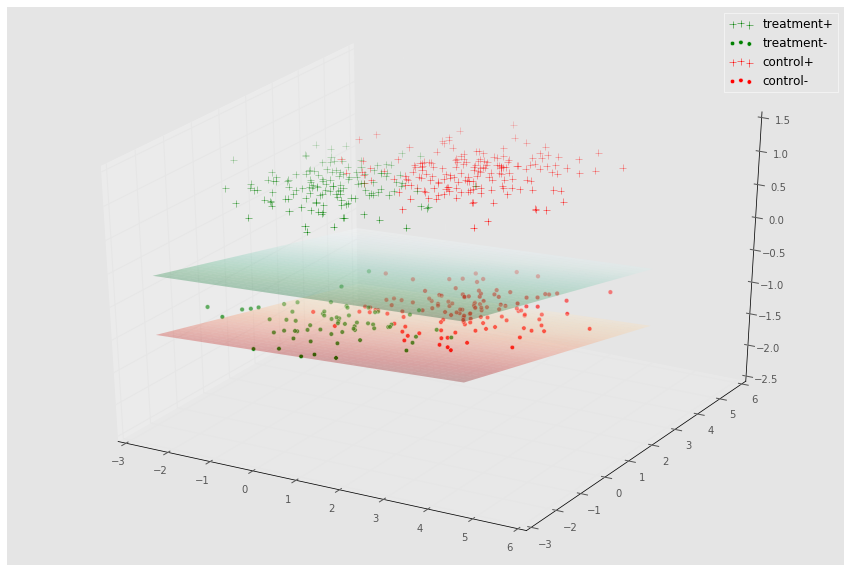

In [8]:
dataset = (model._Dtplus[:,0:2],
           model._Dcminus[:,0:2],
           model._Dtminus[:,0:2],
           model._Dcplus[:,0:2]) # reconcatenate model data

model.hyperplanes(slope = model.w[0:2].flatten(), b1 = model.b1, b2 = model.b2, data = dataset) # plot the hyperplanes